In [116]:
%matplotlib inline
import matplotlib.pyplot as plt

In [117]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [118]:
def kmeans_inertia(df, max_n_clusters):
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    metaid = df['metaid'].values
    X = df.values[:,:-1]
    ss = StandardScaler()
    ss.fit_transform(X)
    distortions =[]
    for i in range(1, max_n_clusters):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    max_iter=300)
        km.fit(X)
        distortions.append(km.inertia_)
    return distortions

In [119]:
df = pd.read_csv('data/dhsipums_data_reduced_90_17.csv')
distortions_90_17 = kmeans_inertia(df, 11)
df = pd.read_csv('data/dhsipums_data_reduced_94_16.csv')
distortions_94_16 = kmeans_inertia(df, 11)
df = pd.read_csv('data/dhsipums_data_reduced_97_15.csv')
distortions_97_15 = kmeans_inertia(df, 11)
df = pd.read_csv('data/dhsipums_data_reduced_75_19.csv')
distortions_75_19 = kmeans_inertia(df, 11)

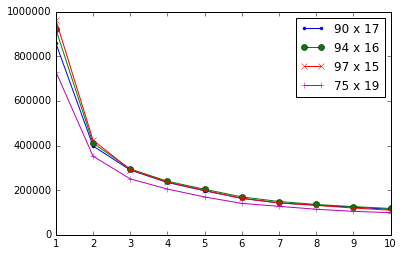

In [120]:
plt.plot(range(1, 11), distortions_90_17, marker='.', color='b', label='90 x 17')
plt.plot(range(1, 11), distortions_94_16, marker='o', color='g', label='94 x 16')
plt.plot(range(1, 11), distortions_97_15, marker='x', color='r', label='97 x 15')
plt.plot(range(1, 11), distortions_75_19, marker='+', color='m', label='75 x 19')
plt.legend(loc='best')
elbow_png = 'data/dhsipums_kmeans_elbow.png'
plt.savefig(elbow_png)

In [121]:
import synapseclient
from synapseclient import File

syn = synapseclient.Synapse()
syn.login()
folder = syn.get('syn6135634')

Welcome, Eric Yi Wu!



In [122]:
syn.store(File(elbow_png, parent=folder))


##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     20.8kB/20.8kB dhsipums_kmeans_elbow.png Done...
    

File(accessControlList='/repo/v1/entity/syn6135761/acl', path='data/dhsipums_kmeans_elbow.png', md5=None, versions='/repo/v1/entity/syn6135761/version', files=['dhsipums_kmeans_elbow.png'], cacheDir='data', name='dhsipums_kmeans_elbow.png', modifiedBy='313799', versionLabel='3', id='syn6135761', dataFileHandleId='9405208', externalURL=None, versionNumber=3, synapseStore=True, createdOn='2016-06-07T10:51:34.535Z', parentId='syn6135634', etag='c9d5bc59-8b72-4c2f-a852-5e74c959270b', versionUrl='/repo/v1/entity/syn6135761/version/3', contentType=None, fileSize=None, modifiedOn='2016-06-07T13:19:18.793Z', createdBy='313799', annotations='/repo/v1/entity/syn6135761/annotations', concreteType='org.sagebionetworks.repo.model.FileEntity', entityType='org.sagebionetworks.repo.model.FileEntity', uri='/repo/v1/entity/syn6135761')

In [123]:
def kmeans(df, n_clusters):
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    metaid = df['metaid'].values
    X = df.values[:,:-1]
    ss = StandardScaler()
    ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    results = DataFrame()
    results['metaid'] = Series(metaid)
    results['cluster'] = Series(km.labels_)
    return results

In [124]:
def write_results(results, n_rows, n_cols, n_clusters, folder):
    fout = 'data/dhsipums_kmeans_' + str(n_rows) + '_' + str(n_cols) + '_' + str(n_clusters) + '.csv'
    results.to_csv(fout, index=False)
    syn.store(File(fout, parent=folder))

In [125]:
df = pd.read_csv('data/dhsipums_data_reduced_90_17.csv')
results = kmeans(df, 3)
write_results(results, 90, 17, 3, folder)
results = kmeans(df, 4)
write_results(results, 90, 17, 4, folder)
results = kmeans(df, 5)
write_results(results, 90, 17, 5, folder)


##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     512.0bytes/512.0bytes dhsipums_kmeans_90_17_3.csv Done...
    
##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     512.0bytes/512.0bytes dhsipums_kmeans_90_17_4.csv Done...
    
##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     512.0bytes/512.0bytes dhsipums_kmeans_90_17_5.csv Done...
    

In [126]:
df = pd.read_csv('data/dhsipums_data_reduced_94_16.csv')
results = kmeans(df, 3)
write_results(results, 94, 16, 3, folder)
results = kmeans(df, 4)
write_results(results, 94, 16, 4, folder)
results = kmeans(df, 5)
write_results(results, 94, 16, 5, folder)


##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     535.0bytes/535.0bytes dhsipums_kmeans_94_16_3.csv Done...
    
##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     535.0bytes/535.0bytes dhsipums_kmeans_94_16_4.csv Done...
    
##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     535.0bytes/535.0bytes dhsipums_kmeans_94_16_5.csv Done...
    

In [127]:
df = pd.read_csv('data/dhsipums_data_reduced_97_15.csv')
results = kmeans(df, 3)
write_results(results, 97, 15, 3, folder)
results = kmeans(df, 4)
write_results(results, 97, 15, 4, folder)
results = kmeans(df, 5)
write_results(results, 97, 15, 5, folder)


##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     552.0bytes/552.0bytes dhsipums_kmeans_97_15_3.csv Done...
    
##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     552.0bytes/552.0bytes dhsipums_kmeans_97_15_4.csv Done...
    
##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     552.0bytes/552.0bytes dhsipums_kmeans_97_15_5.csv Done...
    

In [128]:
df = pd.read_csv('data/dhsipums_data_reduced_75_19.csv')
results = kmeans(df, 2)
write_results(results, 75, 19, 2, folder)
results = kmeans(df, 3)
write_results(results, 75, 19, 3, folder)
results = kmeans(df, 4)
write_results(results, 75, 19, 4, folder)
results = kmeans(df, 5)
write_results(results, 75, 19, 5, folder)
results = kmeans(df, 6)
write_results(results, 75, 19, 6, folder)


##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     425.0bytes/425.0bytes dhsipums_kmeans_75_19_2.csv Done...
    
##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     425.0bytes/425.0bytes dhsipums_kmeans_75_19_3.csv Done...
    
##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     425.0bytes/425.0bytes dhsipums_kmeans_75_19_4.csv Done...
    
##################################################
 Uploading file to Synapse storage 
##################################################
Uploading [####################]100.00%     425.0bytes/425.0bytes dhsipums_kmeans_75_19_5.csv Done...
    
###################